# Сравнение структур данных

### Что такое O-нотация

`O-нотация` или `асимптотическая нотация` – используется для описания производительности алгоритмов в зависимости от размера входных данных. Она показывает, как изменяется время выполнения или использование памяти, по мере роста объёма данных.

`Линейный поиск` обозначается как O(n) – время выполнения зависит от количества элементов в списке. Если список увеличивается в два раза, время выполнения также увеличится в два раза.

`Бинарный поиск` обозначается как O(log n) – время выполнения зависит от логарифма количества элементов. Если список увеличивается в два раза, время выполнения увеличится незначительно.

### Виды О-нотаций

`O(1)`
- Время выполнения не зависит от размера входных данных.
- Пример – доступ к элементу массива по индексу.
- Иллюстрация – график, где линия времени выполнения остаётся плоской при увеличении размера данных.

`O(n)`
- Время выполнения растёт линейно с увеличением размера входных данных.
- Пример – поиск элемента в неотсортированном списке.
- Иллюстрация – график, где время выполнения растёт линейно с увеличением размера данных.

`O(log n)`
- Время выполнения растёт пропорционально логарифму размера входных данных.
- Пример – бинарный поиск в отсортированном списке.
- Иллюстрация – график, где время выполнения растёт медленно, по мере увеличения размера данных.

`O(n^2)`
- Время выполнения растёт пропорционально квадрату размера входных данных.
- Пример – сортировка пузырьком.
- Иллюстрация – график, где время выполнения растёт быстрее, по мере увеличения размера данных.

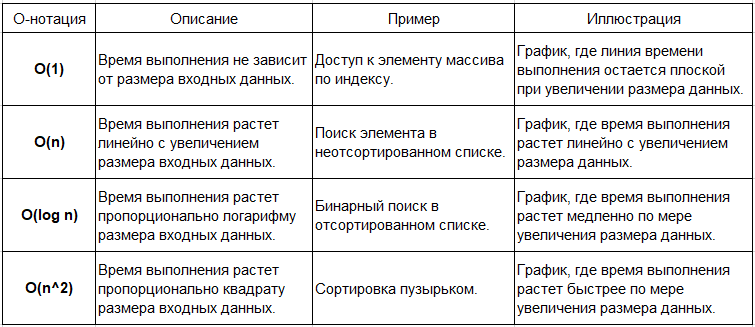

### Сравнение структур данных

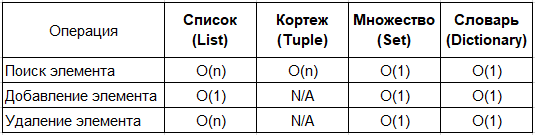

Списки (Lists) – подходят для хранения упорядоченных коллекций элементов с быстрым доступом по индексу, но операции поиска и удаления могут быть медленными.

Кортежи (Tuples) – имеют те же преимущества и недостатки, что и списки, но неизменяемы.

Множества (Sets) – отлично подходят для хранения уникальных элементов и выполнения быстрых операций поиска, добавления и удаления.

Словари (Dictionaries) – идеальны для хранения пар ключ-значение с быстрым доступом, поиском, добавлением и удалением элементов.